# **Done by:** 

P1935433, Kok Yong Hsien, DIT/FT/ 2B/12 (Leader)

P1935970 Cheok Zi Hin, DIT/FT/ 2B/12

P1936207, Emily Lim Xiang Qin, DIT/FT/ 2B/13

# Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
safety = pd.read_csv('Safety_DataSet_Aggregated.csv')

# EDA

In [3]:
safety.dtypes

bookingID           int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label             float64
dtype: object

In [4]:
safety.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    1
gyro_x            1
gyro_y            1
gyro_z            1
second            1
Speed             1
label             1
dtype: int64

In [5]:
safety = safety.ffill()

In [6]:
safety

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0.0
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0.0
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0.0
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0.0
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6533872,644245094404,3.9,32.000000,-0.306467,10.467770,1.778946,-0.012771,0.064109,-0.020692,268.0,13.215492,0.0
6533873,644245094404,3.9,31.000000,0.081405,10.745505,1.101366,-0.007884,0.014629,0.010462,269.0,13.377270,0.0
6533874,644245094404,3.9,31.000000,0.466884,8.827691,1.817254,0.004333,0.007909,0.058720,270.0,13.647820,0.0
6533875,644245094404,3.9,31.000000,-0.031126,10.783813,2.288927,0.065419,0.013407,-0.065286,271.0,13.988210,0.0


In [7]:
safety[safety['bookingID'] == 0].describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1004.0,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.0
mean,0.0,10.165339,176.526099,-0.711264,-9.613822,-1.619658,0.003328,-0.006118,-0.004188,903.526892,8.994822,0.0
std,0.0,3.855898,129.231351,0.928022,0.639934,1.141266,0.065954,0.100225,0.063685,533.745097,7.199919,0.0
min,0.0,4.000000,0.037464,-4.692294,-12.764703,-6.251807,-0.392537,-0.609930,-0.731892,0.000000,-1.000000,0.0
25%,0.0,8.000000,38.211140,-1.185149,-9.903928,-2.250407,-0.027289,-0.046174,-0.029892,250.750000,1.490348,0.0
50%,0.0,8.000000,144.299423,-0.725250,-9.622127,-1.607663,0.002575,-0.002239,-0.003522,1087.500000,8.503366,0.0
75%,0.0,12.000000,312.013893,-0.299371,-9.344438,-1.033743,0.033239,0.032769,0.020893,1338.250000,15.645498,0.0
max,0.0,48.000000,359.979767,4.782614,-6.119916,2.318857,0.438371,0.469724,0.372807,1589.000000,22.946083,0.0


# Feature Engineering

## Feature distance

In [8]:
speed = safety['Speed']
second = safety['second']

In [9]:
distance = speed * second
distance

0             0.000000
1             0.228454
2             0.456909
3             0.685363
4             0.913818
              ...     
6533872    3541.751856
6533873    3598.485630
6533874    3684.911265
6533875    3790.804910
6533876    3790.804910
Length: 6533877, dtype: float64

In [10]:
safety['distance'] = distance

##  Feature speed

In [11]:
safety_acceleration_x = safety['acceleration_x']
safety_acceleration_y = safety['acceleration_y']
safety_acceleration_z = safety['acceleration_z']

In [12]:
speed_x = safety_acceleration_x * second
speed_y = safety_acceleration_y * second
speed_z = safety_acceleration_z * second

In [13]:
safety['speed_x'] = speed_x
safety['speed_y'] = speed_y
safety['speed_z'] = speed_z

## Feature radian

In [14]:
safety_gyro_x = safety['gyro_x']
safety_gyro_y = safety['gyro_y']
safety_gyro_z = safety['gyro_z']

In [15]:
radian_x = safety_gyro_x * second
radian_y = safety_gyro_y * second
radian_z = safety_gyro_z * second

In [16]:
safety['radian_x'] = radian_x
safety['radian_y'] = radian_y
safety['radian_z'] = radian_z

## Making axis interaction

In [17]:
acc_gyro_x = safety_acceleration_x * safety_gyro_x
acc_gyro_y = safety_acceleration_y * safety_gyro_y
acc_gyro_z = safety_acceleration_z * safety_gyro_z

In [18]:
safety['acc_gyro_x'] = acc_gyro_x
safety['acc_gyro_y'] = acc_gyro_y
safety['acc_gyro_z'] = acc_gyro_z

## Transform the accelerometer data

In [19]:
acceleration_magnitude = safety_acceleration_x**2 + safety_acceleration_y**2 + safety_acceleration_z**2

In [20]:
acceleration_magnitude = np.sqrt(acceleration_magnitude)

In [21]:
safety['acceleration_magnitude'] = acceleration_magnitude

## Transform the gyroscope data

In [22]:
gyro_magnitude = safety_gyro_x**2 + safety_gyro_y**2 + safety_gyro_z**2

In [23]:
gyro_magnitude = np.sqrt(gyro_magnitude)

In [24]:
safety['gyro_magnitude'] = gyro_magnitude

In [25]:
safety.shape

(6533877, 24)

# Model Building

In [26]:
grouped_safety = safety.groupby(by = 'bookingID',as_index=False).mean()

In [27]:
grouped_safety[grouped_safety['label'] == 0].count()

bookingID                 6253
Accuracy                  6253
Bearing                   6253
acceleration_x            6253
acceleration_y            6253
acceleration_z            6253
gyro_x                    6253
gyro_y                    6253
gyro_z                    6253
second                    6253
Speed                     6253
label                     6253
distance                  6253
speed_x                   6253
speed_y                   6253
speed_z                   6253
radian_x                  6253
radian_y                  6253
radian_z                  6253
acc_gyro_x                6253
acc_gyro_y                6253
acc_gyro_z                6253
acceleration_magnitude    6253
gyro_magnitude            6253
dtype: int64

In [28]:
grouped_safety[grouped_safety['label'] == 1].count()

bookingID                 1883
Accuracy                  1883
Bearing                   1883
acceleration_x            1883
acceleration_y            1883
acceleration_z            1883
gyro_x                    1883
gyro_y                    1883
gyro_z                    1883
second                    1883
Speed                     1883
label                     1883
distance                  1883
speed_x                   1883
speed_y                   1883
speed_z                   1883
radian_x                  1883
radian_y                  1883
radian_z                  1883
acc_gyro_x                1883
acc_gyro_y                1883
acc_gyro_z                1883
acceleration_magnitude    1883
gyro_magnitude            1883
dtype: int64

In [29]:
X = grouped_safety.drop(['label'], axis = 1)
X

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,distance,speed_x,speed_y,speed_z,radian_x,radian_y,radian_z,acc_gyro_x,acc_gyro_y,acc_gyro_z,acceleration_magnitude,gyro_magnitude
0,0,10.165339,176.526099,-0.711264,-9.613822,-1.619658,0.003328,-0.006118,-0.004188,903.526892,8.994822,11046.251930,-649.397432,-8685.711305,-1474.337306,3.117746,-3.763111,-4.408486,-0.011891,0.067631,0.001921,9.886164,0.100772
1,1,3.718763,124.198590,-0.525406,9.532086,-2.198999,-0.002467,-0.007540,0.000405,581.175088,7.881588,5521.932267,-296.255476,5530.225067,-1290.127486,-1.574245,-3.680678,0.115987,0.002711,-0.070063,-0.001414,9.862507,0.066187
2,2,3.930626,173.794872,0.306786,9.843183,0.139347,0.006458,-0.012861,0.002597,339.441026,3.157213,853.485445,166.995474,3322.604563,105.561403,1.900514,-4.632578,-0.086165,-0.000493,-0.124528,-0.003984,9.929590,0.097433
3,4,10.000000,151.807013,-0.365117,-9.406439,-2.613639,-0.022884,0.023232,-0.000376,547.495430,6.150996,3945.859300,-186.771902,-5164.378666,-1403.165916,-12.736610,17.321556,1.521071,0.010705,-0.224052,0.000394,9.813434,0.108875
4,6,4.586721,197.812785,0.490616,9.538043,2.355059,0.003877,0.000436,0.002930,547.000000,4.628921,3158.152397,293.796925,5215.909839,1286.210423,2.599539,0.593328,2.399600,0.002100,0.007564,0.005758,9.918090,0.089589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,635655159970,3.892344,140.297398,0.326105,9.598309,2.191064,-0.004107,-0.002336,-0.001307,526.724907,12.920234,8889.756058,183.216752,5062.114619,1146.648767,-3.820055,-0.596761,-0.501094,-0.011113,-0.024755,-0.009894,9.937882,0.130525
8140,635655159971,9.197392,206.606686,-1.223344,9.518680,-2.672515,-0.014633,-0.005800,-0.025334,571.878073,9.478112,7908.608466,-720.926864,5453.798327,-1550.879710,-8.017773,-5.796650,-14.643691,0.015261,-0.054585,0.068222,10.022862,0.155660
8141,644245094400,4.407753,134.405889,-3.200973,7.366686,4.064176,0.043626,-0.037832,-0.023008,485.582545,8.421009,5218.333176,-2284.889241,3291.074328,1510.036674,37.870827,-26.732559,-16.338340,-0.456219,-0.215260,-0.086213,9.915128,0.290968
8142,644245094401,6.901443,171.840000,0.274707,8.726816,4.341636,-0.036109,-0.189896,-0.091221,189.400000,8.029307,1341.474240,68.398869,1649.123435,826.952277,-5.509963,-35.847701,-14.451565,-0.041584,-1.630959,-0.411285,9.819511,0.695246


In [30]:
y = grouped_safety['label']
y = y.astype('int')
y

0       0
1       1
2       1
3       1
4       0
       ..
8139    0
8140    0
8141    0
8142    0
8143    0
Name: label, Length: 8144, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(
    X , y  , test_size = 0.3, random_state = 38
)

In [32]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (5700, 23)
y_train (5700,)
X_test (2444, 23)
y_test (2444,)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (5700, 23)
y_train (5700,)
X_test (2444, 23)
y_test (2444,)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# build the model
# create model
model = Sequential()
model.add(Dense(100, input_dim=23, activation='relu'))
model.add(Dense(20,activation='relu'))

# add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

print(model.summary())

callback = EarlyStopping(monitor='val_loss', patience = 10, verbose = 2)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=25, batch_size=10000,callbacks=[callback], verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2400      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 4,441
Trainable params: 4,441
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25
1/1 - 0s - loss: 0.6856 - accuracy: 0.5563 - val_loss: 0.6739 - val_accuracy: 0.6162
Epoch 2/25
1/1 - 0s - loss: 0.6724 - accuracy: 0.6144 - val_loss: 0.6611 - val_accuracy: 0.6559
Epoch 3/25
1/1 - 0s - loss: 0.6601 - accuracy: 0.6628 - val_loss: 0.6494 - val_accuracy: 0.6907
Epoch 4/25
1/1 - 0s - loss: 0.6487 - accuracy: 0.7037 - val_loss: 0.6387 - val_accuracy: 0.

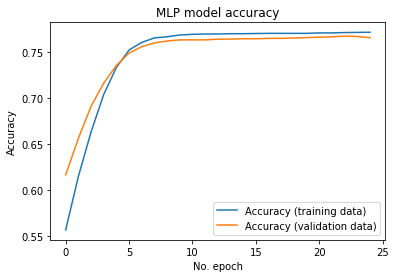

In [36]:
# Plot history: Accuracy
# plt.ylim(0.8, 1.05)
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('MLP model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

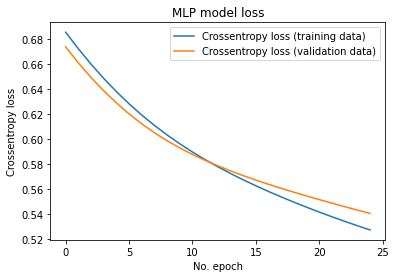

In [37]:
# Plot history: Loss
# plt.ylim(-0.05, 0.6)
plt.plot(history.history['loss'], label='Crossentropy loss (training data)')
plt.plot(history.history['val_loss'], label='Crossentropy loss (validation data)')
plt.title('MLP model loss')
plt.ylabel('Crossentropy loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()